In [15]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    margin: auto;
    }
</style>
""")

In [47]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
path = "../../csv/Mercedes-Benz Greener Manufacturing/"

In [2]:
train = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+"test.csv")

In [3]:
train.head(10)
train.shape, test.shape
train.info()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
5,18,92.93,t,b,e,c,d,g,h,s,...,0,0,1,0,0,0,0,0,0,0
6,24,128.76,al,r,e,f,d,f,h,s,...,0,0,0,0,0,0,0,0,0,0
7,25,91.91,o,l,as,f,d,f,j,a,...,0,0,0,0,0,0,0,0,0,0
8,27,108.67,w,s,as,e,d,f,i,h,...,1,0,0,0,0,0,0,0,0,0
9,30,126.99,j,b,aq,c,d,f,a,e,...,0,0,1,0,0,0,0,0,0,0


((4209, 378), (4209, 377))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


Okay, so there are 4209 values in train and test. There are 378 columns including the target variable out of which 8 are object type, 1 is float(target variable 'y') and rest are integer. 

In [4]:
cat_feat = train.select_dtypes(include=['object']).columns
num_feat = train.select_dtypes(include=['int64', 'float64']).columns

cat_feat has all categorical features, while num_feat has all numerical features.

In [6]:
train.isnull().sum().sum()

0

Also we can see that there are no null values. 

Let's first see how are target variable is distributed. 

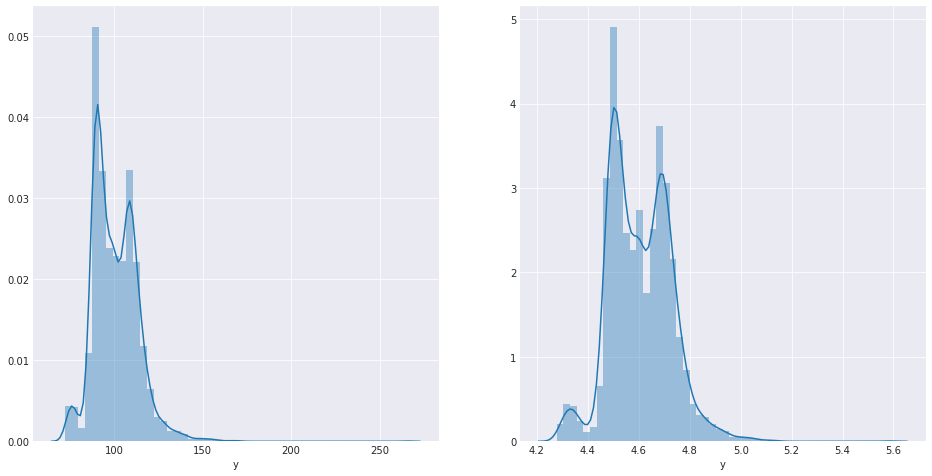

In [19]:
_,ax = plt.subplots(ncols=2, figsize=(16,8))
sns.set_style('darkgrid')
sns.distplot(train['y'], ax=ax[0])
sns.distplot(np.log(train['y']), ax=ax[1])

In [22]:
train['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

So the target variable 'y'(time in seconds a car took to pass testing) caries from 72.11 to 265.32 with a mean of 100.67 and standard deviation of 12.68 . Also the first plot shows that it is positively skewed and has high kurtosis. 
Since most of the statistical tests require the variable to be normally distributed, lets use log transformation on 'y' to bring it closer to normal. 

Before Transformation : 
Skewness : 1.2060958289669412
Kurtosis : 7.899893252938124

After Transformation : 
Skewness : 0.38984118039470267
Kurtosis : 1.3065600357272684


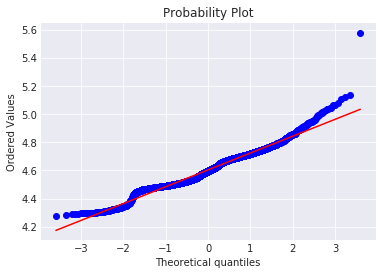

In [59]:
print ("Before Transformation : ")
print ("Skewness : {0}".format(stats.skew((train['y']))))
print ("Kurtosis : {0}".format(stats.kurtosis(train['y'])))

train['logy'] = np.log(train['y'])

print ("\nAfter Transformation : ")
print ("Skewness : {0}".format(stats.skew((train['logy']))))
print ("Kurtosis : {0}".format(stats.kurtosis(train['logy'])))

_, ax = plt.subplots()
prob = stats.probplot(train['logy'], plot=ax)

After transformation we see that the skewness and kurtosis are within acceptable range ie between +2 to -2. 

Now we will analyse our categorical variables.

## Categorical Varibles

In [36]:
train[cat_feat].describe()

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,v,g,j
freq,360,833,1659,1942,4205,231,1042,277


Lets individually check X3, X4 as they have relatively few levels. 
#### X3

In [43]:
train['X3'].value_counts()
train['X3'].head(20)

c    1942
f    1076
a     440
d     290
g     241
e     163
b      57
Name: X3, dtype: int64

0     a
1     e
2     c
3     f
4     f
5     c
6     f
7     f
8     e
9     c
10    f
11    f
12    c
13    f
14    e
15    f
16    f
17    c
18    c
19    f
Name: X3, dtype: object

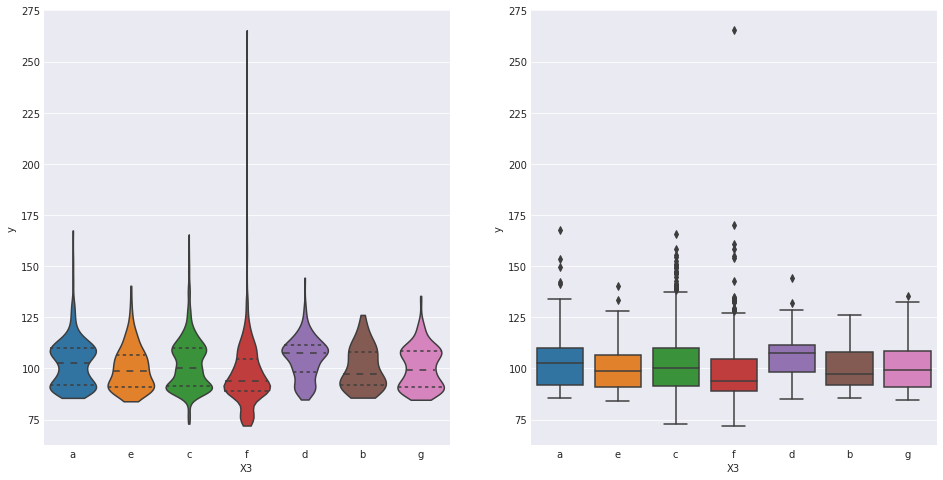

In [133]:
_, ax = plt.subplots(figsize=(16,8), ncols=2)
sns.violinplot(x='X3', y='y', data=train, cut=0, inner='quartile', ax=ax[0], scale='width')
sns.boxplot(x='X3', y='y', data=train, ax=ax[1])

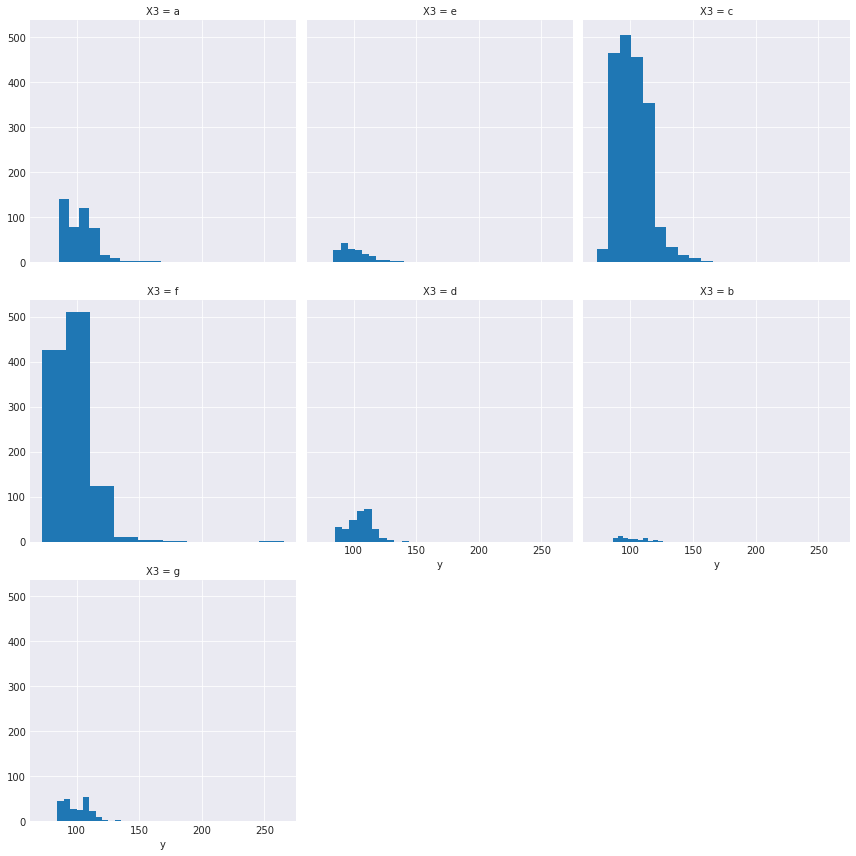

In [63]:
g = sns.FacetGrid(train, col_wrap=3, size=4, aspect=1, col='X3')
g = g.map(plt.hist, 'y')

Above 2 plots show quite a contrast in our target feature 'y' amongst various levels of X3. Target feature 'y' has a distinguishably different mean and distributions for levels c, f, d, b. So this feature X3 seems important but lets try to quantify our findings by runnings an ANOVA and see whether these changes in y are by chance or X3 is statiscally important. 

In [120]:
def anova(cat, num):
    samples = []
    for level in train[cat].unique():
        values = train.loc[train[cat]==level, [num]].values
        samples.append(values)
    f_stat, p_val = stats.f_oneway(*samples)
    print ("F Statistic : {0}".format(f_stat))
    print ("p value : {0}".format(p_val))

anova('X3', 'logy')

F Statistic : [ 37.54337884]
p value : [  1.30814734e-44]


With a high F-statistic and low p-value we can say that the differences in mean in target feature y/logy aren't by chance but due to X3. But to find out whether all levels make a significant difference we need to one-hot encode our variables and then conduct a t-test and find a p-value for each dummy variable. 
Let's try a similar analysis for X4 and X6

### X4


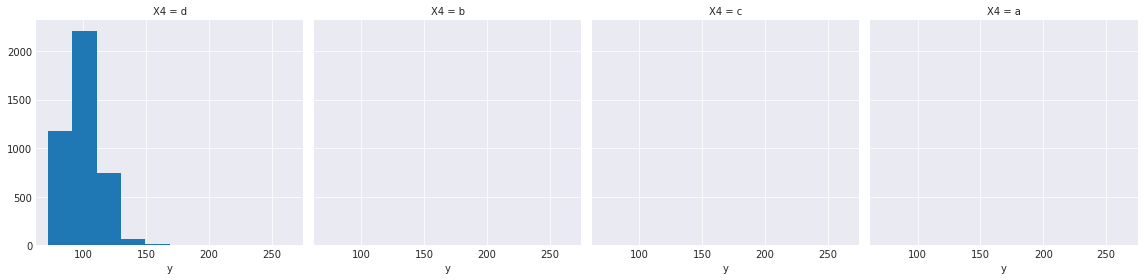

In [130]:
g = sns.FacetGrid(col='X4', data=train, col_wrap=4, size=4, aspect=1)
g = g.map(plt.hist, 'y')


In [125]:
train['X4'].value_counts()

d    4205
a       2
c       1
b       1
Name: X4, dtype: int64

As we see most of the values in X4 belong to level 'd' and thus this feature could be dropped for being a near zero variance predictor. 

### X6

In [128]:
train['X6'].value_counts()

g    1042
j    1039
d     625
i     488
l     478
a     206
h     190
k      43
c      38
b      28
f      20
e      12
Name: X6, dtype: int64

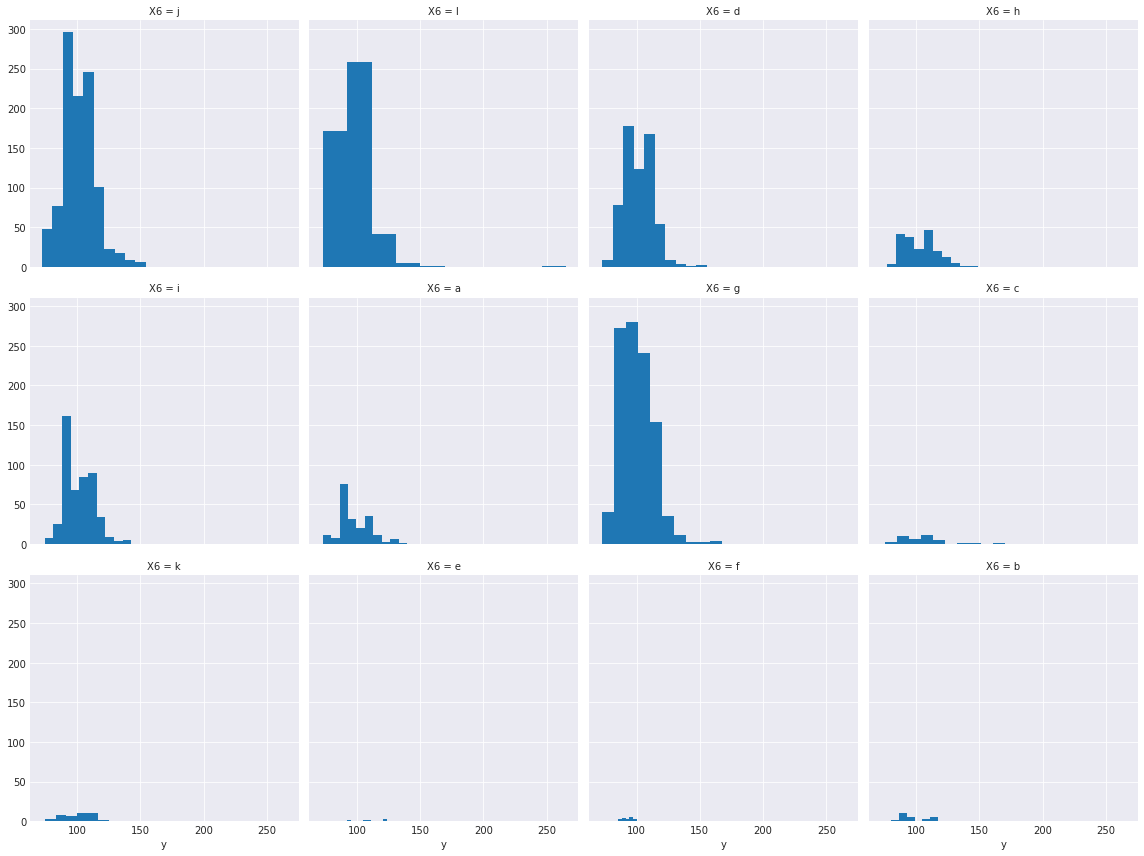

In [131]:
g = sns.FacetGrid(data=train, col='X6', size=4, aspect=1, col_wrap=4)
g.map(plt.hist, 'y')

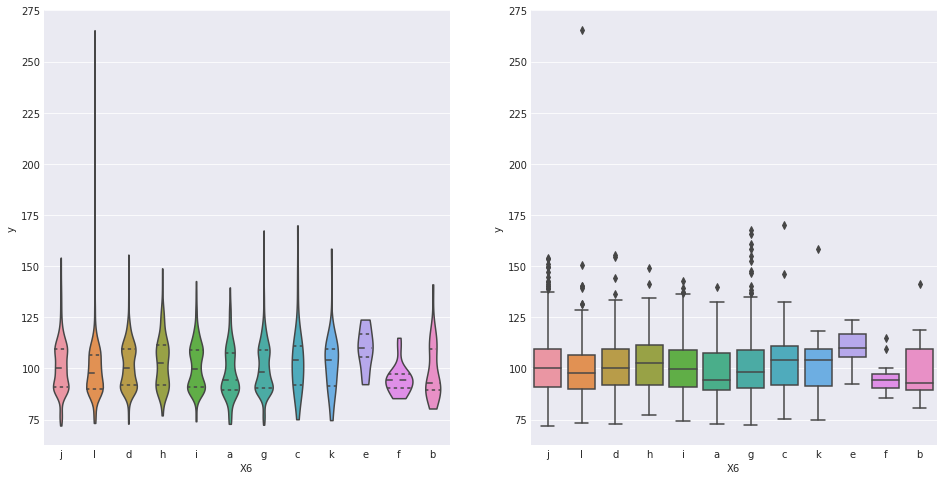

In [135]:
_, ax = plt.subplots(figsize=(16,8), ncols=2)
sns.violinplot(x='X6', y='y', data=train, ax=ax[0], cut=0, inner='quartile')
sns.boxplot(x='X6', y='y', data=train, ax=ax[1])

The plots show that the categories make a difference in the target feature. Let's verify this statistically. 

In [139]:
anova('X6', 'logy')

F Statistic : [ 4.53130894]
p value : [  7.37401319e-07]


Yup, X6 is also statiscally significant. So lets check p-value for each of the categorical features. 

In [141]:
for feat in cat_feat:
    print ('\n'+feat)
    anova(feat, 'logy')


X0
F Statistic : [ 156.42331616]
p value : [ 0.]

X1
F Statistic : [ 8.25031423]
p value : [  1.16538378e-30]

X2
F Statistic : [ 33.01281197]
p value : [  3.94362277e-229]

X3
F Statistic : [ 37.54337884]
p value : [  1.30814734e-44]

X4
F Statistic : [ 2.28399826]
p value : [ 0.07692973]

X5
F Statistic : [ 2.13206919]
p value : [ 0.00047722]

X6
F Statistic : [ 4.53130894]
p value : [  7.37401319e-07]

X8
F Statistic : [ 5.60662972]
p value : [  4.84094033e-17]


The features are statistically significant except for X4. And as we saw X4 is a near 0 variance predictorand so it is better to not include it in modelling. 